# Setup

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import anndata as ad
import scrnatools as rna
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

In [3]:
# Setup figure params
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Arial"
sc.set_figure_params(dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.grid"] = False
cmap = sns.color_palette("colorblind")

In [4]:
warnings.resetwarnings()

## Set up file paths

### demeter

In [5]:
rawDataPath = "/mnt/iacchus/joe/raw_data/"
processedDataPath = "/mnt/iacchus/joe/processed_data/"

### gardner-lab-computer

In [6]:
# rawDataPath = "/mnt/e/Archive/Joe/raw_data/"
# processedDataPath = "/mnt/e/Archive/Joe/processed_data/"

## Import data

In [7]:
adata = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/Fezf2_EnR_TECs.h5ad")

# Differential Density

## Fezf2 KO

In [8]:
adata = rna.tl.log_density_ratio(
    adata,
    group_by="genotype",
    groups=["WT", "Fezf2_KO"],
    key_added="Fezf2_KO/WT_genotype_density",
    latent_rep="X_umap",
)

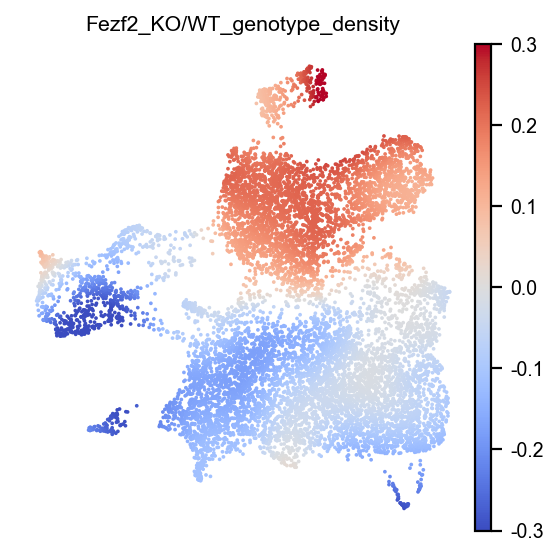

In [9]:
sc.settings.figdir = "../analysis/paper_figures/5/"
sc.pl.umap(
    adata,
    color="Fezf2_KO/WT_genotype_density",
    cmap="coolwarm",
    vmin=-0.3,
    vmax=0.3,
    save="_5B_Fezf2_KO_density.pdf"
)

## Fezf2 KO EnR

In [10]:
adata = rna.tl.log_density_ratio(
    adata,
    group_by="genotype",
    groups=["WT", "Fezf2_KO_EnR"],
    key_added="Fezf2_KO_EnR/WT_genotype_density",
    latent_rep="X_umap",
)

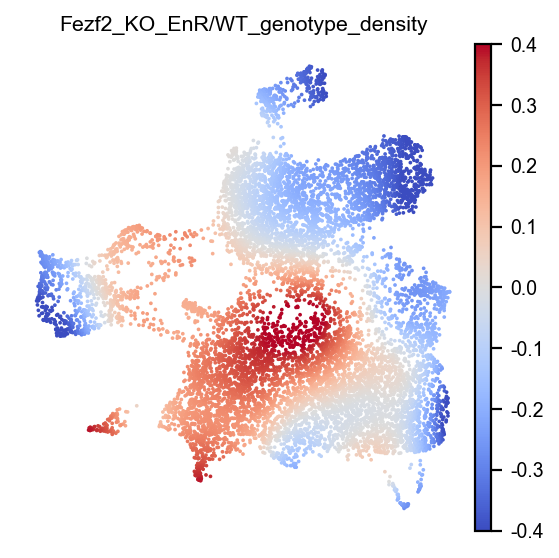

In [16]:
sc.settings.figdir = "../analysis/paper_figures/5/"
sc.pl.umap(
    adata,
    color="Fezf2_KO_EnR/WT_genotype_density",
    cmap="coolwarm",
    vmin=-0.4,
    vmax=0.4,
    save="_5B_Fezf2_KO_EnR_density.pdf"
)

# Cell type abundance

In [12]:
abundance_data = pd.DataFrame()
for genotype in adata.obs.genotype.unique():
    genotype_data = adata[adata.obs.genotype == genotype]
    cell_type_abundances = genotype_data.obs.majority_voting.value_counts()
    cell_type_abundances = cell_type_abundances/genotype_data.shape[0]*100
    cell_type_abundances = pd.DataFrame(cell_type_abundances)
    cell_type_abundances = cell_type_abundances.reset_index()
    cell_type_abundances.columns = ["cell_type", "abundance"]
    cell_type_abundances["genotype"] = genotype
    abundance_data = pd.concat([abundance_data, cell_type_abundances], ignore_index=True)

In [13]:
abundance_data

,cell_type,abundance,genotype
0,Immature MEC,34.703483,WT
1,Aire-stage,29.337935,WT
2,Tuft2,6.495136,WT
3,"Lung, basal",5.522435,WT
4,"Skin, basal",4.267336,WT
5,Gut/Liver,4.016316,WT
6,TA MEC,3.545654,WT
7,Goblet,3.231880,WT
8,Tuft1,2.416065,WT
9,"Skin, keratinized",1.788516,WT


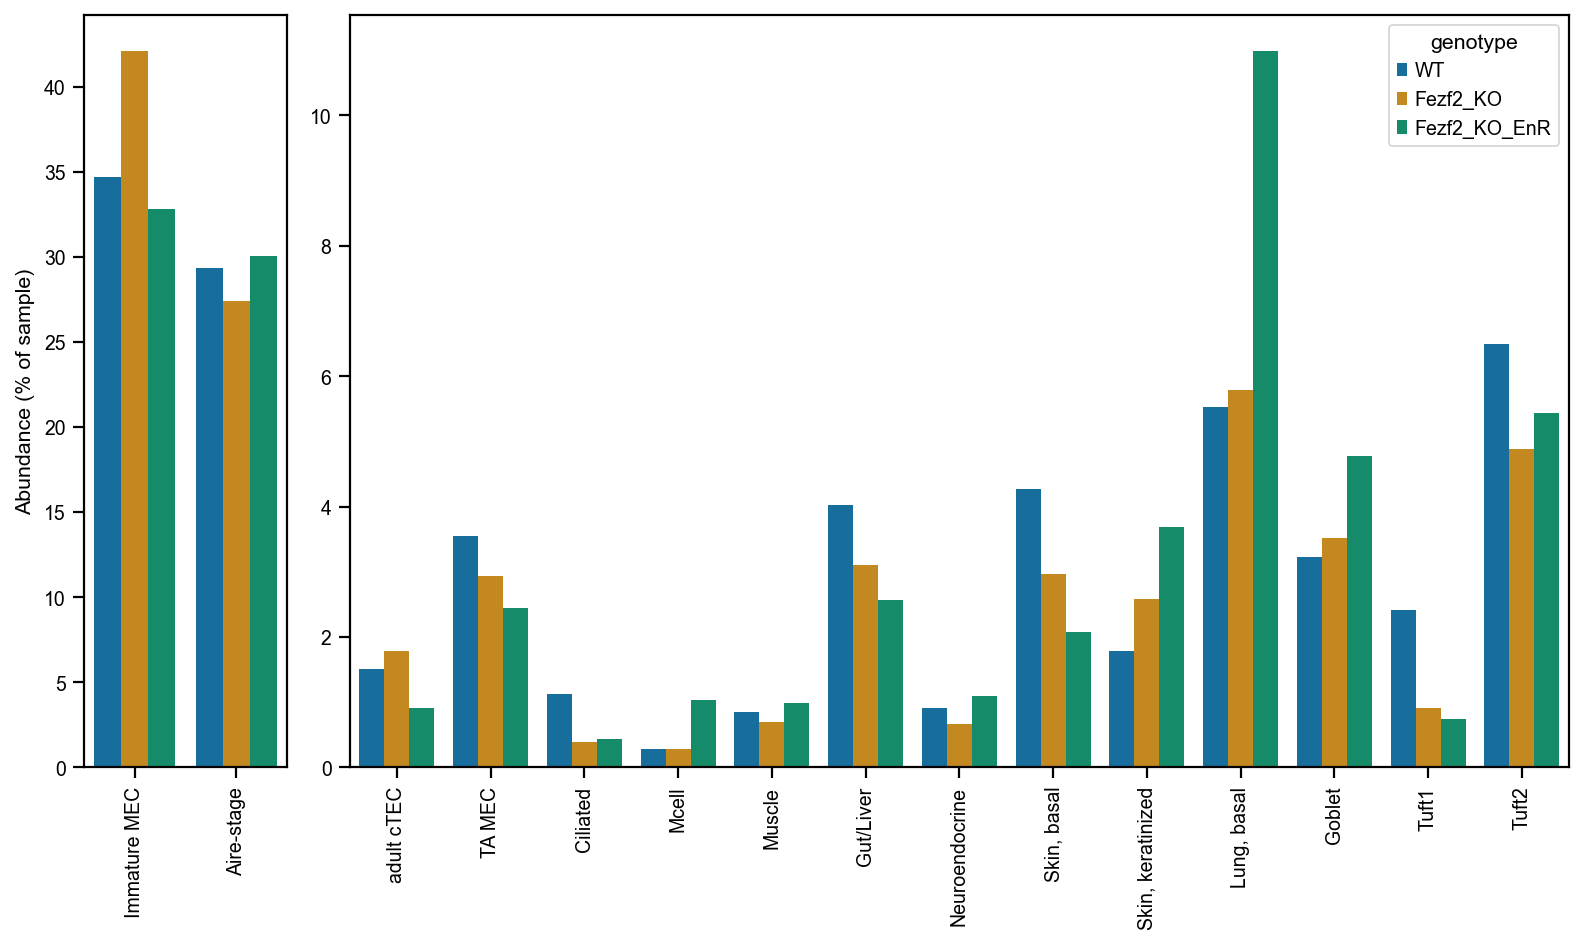

In [14]:
fig, axs = plt.subplots(1,2,figsize=(10,6), gridspec_kw={'width_ratios': [1, 6]})

sns.barplot(
    abundance_data[abundance_data.cell_type.isin(["Aire-stage", "Immature MEC"])],
    x="cell_type",
    y="abundance",
    hue="genotype",
    ax=axs[0],
    order = ["Immature MEC", "Aire-stage"],
    palette=cmap[0:3],
)
# for cell_type in ["Aire-stage", "Immature MEC"]:
#     sns.stripplot(
#         abundance_data[abundance_data.cell_type == cell_type],
#         x="cell_type",
#         y="abundance",
#         hue="genotype",
#         dodge=True,
#         s=5,
#         ax=axs[0],
#         legend=None,
#         palette=["black"]*3,
#         order = ["Immature MEC", "Aire-stage"],
#         jitter=False
#     )
axs[0].get_legend().remove()
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel("")
axs[0].set_ylabel("Abundance (% of sample)")
axs[0].grid(False)

sns.barplot(
    abundance_data[~abundance_data.cell_type.isin(["Aire-stage", "Immature MEC"])],
    x="cell_type",
    y="abundance",
    hue="genotype",
    ax=axs[1],
    order = [
        "adult cTEC", "TA MEC", "Ciliated", "Mcell", "Muscle", 
        "Gut/Liver", "Neuroendocrine", "Skin, basal", "Skin, keratinized",
        "Lung, basal", "Goblet", "Tuft1", "Tuft2"
    ],
    palette=cmap[0:3],
)
# for cell_type in abundance_data.cell_type.unique():
#     if cell_type not in ["Aire-stage", "Immature MEC"]:
#         sns.stripplot(
#             abundance_data[abundance_data.cell_type == cell_type],
#             x="cell_type",
#             y="abundance",
#             hue="genotype",
#             dodge=True,
#             s=5,
#             ax=axs[1],
#             legend=None,
#             palette=["black"]*3,
#             order = [
#                 "adult cTEC", "TA MEC", "Ciliated", "Mcell", 
#                 "Gut/Liver", "Neuroendocrine", "Skin, basal", "Skin, keratinized",
#                 "Lung, basal", "Goblet", "Tuft1", "Tuft2"
#             ],
#             jitter=False
#         )
axs[1].set_ylabel("")
axs[1].set_xlabel("")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].grid(False)

plt.subplots_adjust(wspace=0.15)
plt.tight_layout()
plt.savefig("../analysis/paper_figures/5/5C_scRNAseq_cell_type_abundances.pdf")
plt.show()

# Save data

In [15]:
adata.write(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/combined_all_genes_TECs.h5ad")